In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
# Load dataset (replace 'your_data.csv' with the actual file path)
df = pd.read_csv(r"C:\Users\VINODA B L\OneDrive\Documents\regression_dataset.csv")

In [9]:
# Assume dataset has 'Experience', 'Education', and 'Salary' columns
X = df[['Experience', 'Education']]
y = df['Salary']

In [10]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict salaries for test set
y_pred = model.predict(X_test)

In [13]:
# Evaluate model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 22.725314800787366


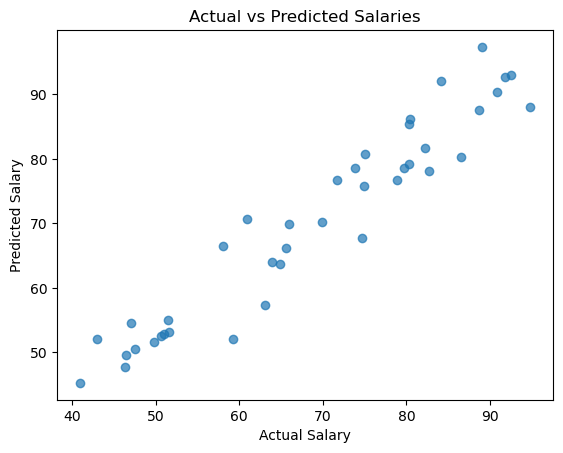

In [14]:
# Plot actual vs predicted salaries
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salaries")
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Load dataset
file_path = r"C:\Users\VINODA B L\OneDrive\Documents\regression_dataset.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

In [6]:
# Display dataset overview
print("Dataset Overview:\n", df.head())
df.info()

Dataset Overview:
    Experience  Education     Salary  Above_50K
0           7         18  67.837159          1
1          15         18  82.861084          1
2          11         11  78.862057          1
3           8         16  62.049293          1
4           7         19  68.099778          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  200 non-null    int64  
 1   Education   200 non-null    int64  
 2   Salary      200 non-null    float64
 3   Above_50K   200 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [7]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Experience    0
Education     0
Salary        0
Above_50K     0
dtype: int64


In [8]:
# Handle missing values (if any) by filling with mean
df.fillna(df.mean(), inplace=True)

In [9]:
# Selecting features (Experience & Education) and target (Above_50K classification)
feature_columns = ["Experience", "Education"]  # Update column names as per your dataset
target_column = "Above_50K"  # Update with actual column name

X = df[feature_columns]
y = df[target_column]

In [10]:
# Convert categorical variables (if Education is categorical)
X = pd.get_dummies(X, drop_first=True)

In [11]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize numerical features (optional, useful if values vary a lot)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Predict on test data
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [16]:
print("\nModel Performance:")
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Model Performance:
Accuracy Score: 87.50%

Confusion Matrix:
 [[ 2  5]
 [ 0 33]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.87      1.00      0.93        33

    accuracy                           0.88        40
   macro avg       0.93      0.64      0.69        40
weighted avg       0.89      0.88      0.84        40



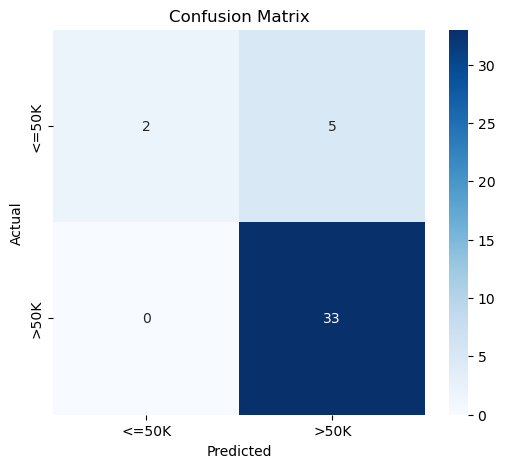

In [17]:
# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()